In [8]:
import polars as pl
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
  
# read the CSV file 
df = pl.read_csv('spotify_2023.csv', ignore_errors=True)


def spotify_song():
    return df

# check the head
# df.head()

# compute summary statistics
summary = df.describe()
print(summary)

shape: (9, 25)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ describe  ┆ track_nam ┆ artist(s) ┆ artist_co ┆ … ┆ acousticn ┆ instrumen ┆ liveness_ ┆ speechin │
│ ---       ┆ e         ┆ _name     ┆ unt       ┆   ┆ ess_%     ┆ talness_% ┆ %         ┆ ess_%    │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 953       ┆ 953       ┆ 953.0     ┆ … ┆ 953.0     ┆ 953.0     ┆ 953.0     ┆ 953.0    │
│ null_coun ┆ 19        ┆ 14        ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ null      ┆ null      ┆ 1.556139  ┆ … ┆ 27.057712 ┆ 1.581322  

In [2]:
track_col = ['streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[track_col]
df_voi.head()

streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64
141381703,125,"""B""","""Major""",80,89,83,31,0,8,4
133716286,92,"""C#""","""Major""",71,61,74,7,0,10,4
140003974,138,"""F""","""Major""",51,32,53,17,0,31,6
800840817,170,"""A""","""Major""",55,58,72,11,0,11,15
303236322,144,"""A""","""Minor""",65,23,80,14,63,11,6


In [3]:
# compute summary statistics
summary_col = df_voi.describe()
print(summary_col)

shape: (9, 12)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ describe   ┆ streams    ┆ bpm        ┆ key  ┆ … ┆ acousticne ┆ instrumen ┆ liveness_ ┆ speechine │
│ ---        ┆ ---        ┆ ---        ┆ ---  ┆   ┆ ss_%       ┆ talness_% ┆ %         ┆ ss_%      │
│ str        ┆ f64        ┆ f64        ┆ str  ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ f64        ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 953.0      ┆ 953.0      ┆ 953  ┆ … ┆ 953.0      ┆ 953.0     ┆ 953.0     ┆ 953.0     │
│ null_count ┆ 1.0        ┆ 0.0        ┆ 95   ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 5.1414e8   ┆ 122.540399 ┆ null ┆ … ┆ 27.057712  ┆ 1.581322  ┆ 18.213012 ┆ 10.131165 │
│ std        ┆ 5.6686e8   ┆ 28.057802  ┆ null ┆ … ┆ 25.996077  ┆ 8.4098    ┆

shape: (10, 24)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ track_nam ┆ artist(s) ┆ artist_co ┆ released_ ┆ … ┆ acousticn ┆ instrumen ┆ liveness_ ┆ speechin │
│ e         ┆ _name     ┆ unt       ┆ year      ┆   ┆ ess_%     ┆ talness_% ┆ %         ┆ ess_%    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ str       ┆ i64       ┆ i64       ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Starboy   ┆ The       ┆ 2         ┆ 2016      ┆ … ┆ 16        ┆ 0         ┆ 13        ┆ 28       │
│           ┆ Weeknd,   ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ Daft Punk ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Closer    ┆ The Chain ┆ 2         ┆ 2016      ┆ … ┆ 41        ┆ 0        

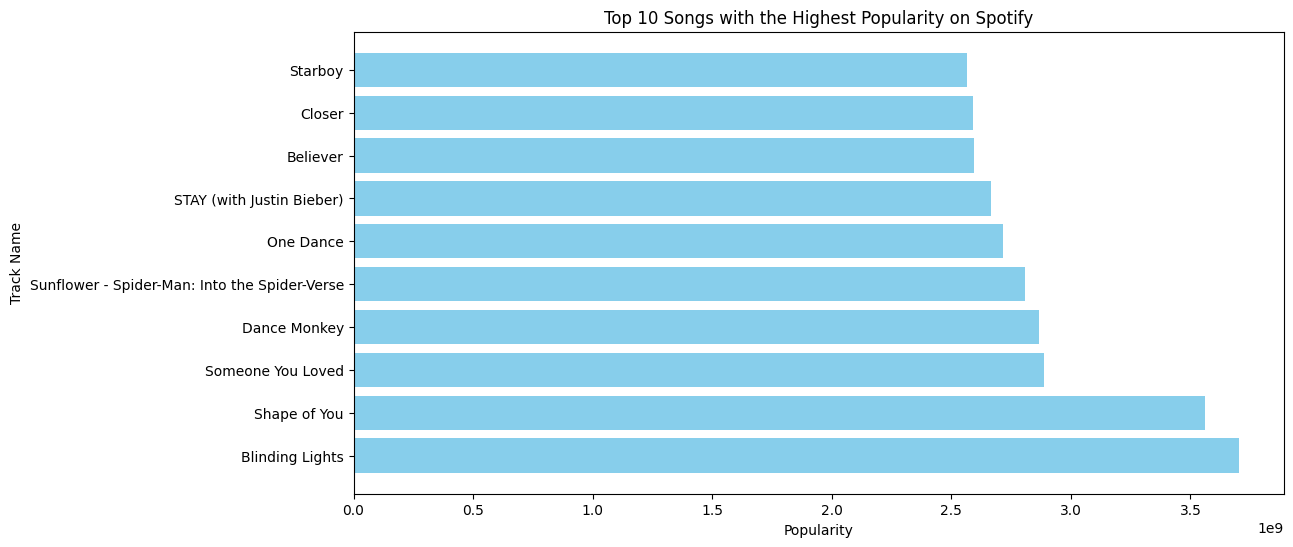

In [4]:
# Sort the DataFrame by 'popularity' in descending order
df = pl.read_csv('spotify_2023.csv', ignore_errors=True)

# Sort the DataFrame by 'popularity' in descending order
df_sorted = df.sort("streams")

# Select the top 10 songs
top_songs = df_sorted.tail(10)
print(top_songs)

plt.figure(figsize=(12, 6))
plt.barh(top_songs['track_name'], top_songs['streams'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with the Highest Popularity on Spotify')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most popular song at the top
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()
